In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500) # show more columns
nan = np.nan # store numpy.nan in 'nan'

In [2]:
raw_data1 = pd.read_csv('births_over30_utf8_raw.csv', sep=';', header=1)
raw_data2 = pd.read_csv('births_total_sub30_utf8_raw.csv', sep=';', header=1)
raw_data1.drop('Staatsangehörigkeit des Kindes', axis=1, inplace=True)
raw_data2.drop('Staatsangehörigkeit des Kindes', axis=1, inplace=True)
# rename the columns
d = {'Jahr':'year', 'Kanton (-) / Bezirk (>>) / Gemeinde (......)': 'commune_name', 
                   'Geschlecht des Kindes':'kid_gender',
                   '30-34 Jahre':'mother age 30-34',
                   '35-39 Jahre':'mother age 35-39', 
                   '40 Jahre und mehr':'mother age 40-99',
                   'Unter 25 Jahren':'mother age 0-25',
                    '25-29 Jahre':'mother age 25-29',
                    'Altersklasse der Mutter - Total': 'total births'}
raw_data1.rename(columns=d, inplace=True)
raw_data2.rename(columns=d, inplace=True)


In [3]:
raw_data1.head()

,year,commune_name,kid_gender,mother age 30-34,mother age 35-39,mother age 40-99
0,2013,Schweiz,Knabe,16150,10101,2567
1,2013,Schweiz,Mädchen,14950,9734,2547
2,2013,- Zürich,Knabe,3091,2324,550
3,2013,- Zürich,Mädchen,2817,2224,608
4,2013,>> Bezirk Affoltern,Knabe,111,84,18


In [4]:
raw_data2.head()

,year,commune_name,kid_gender,total births,mother age 0-25,mother age 25-29
0,2013,Schweiz,Knabe,42595,3448,10329
1,2013,Schweiz,Mädchen,40136,3257,9648
2,2013,- Zürich,Knabe,8195,574,1656
3,2013,- Zürich,Mädchen,7801,550,1602
4,2013,>> Bezirk Affoltern,Knabe,274,20,41


In [5]:
# remove cantons and bezirk and remove '......' from names
def _remove_dots(row):
    return row['commune_name'].replace('......', '')
def _keep_only_communes(df):
    tmp = df[df['commune_name'].str.find('......') >= 0]
    tmp['commune_name'] = tmp.apply(_remove_dots, axis=1)
    return tmp


In [6]:
raw_data1 = _keep_only_communes(raw_data1)
raw_data2 = _keep_only_communes(raw_data2)

In [7]:
# merge the two datasets
data = raw_data1.merge(raw_data2, on=['year', 'commune_name', 'kid_gender'])
data.head()

,year,commune_name,kid_gender,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
0,2013,0001 Aeugst am Albis,Knabe,4,5,1,11,0,1
1,2013,0001 Aeugst am Albis,Mädchen,4,2,1,8,0,1
2,2013,0002 Affoltern am Albis,Knabe,17,14,7,61,7,16
3,2013,0002 Affoltern am Albis,Mädchen,16,12,0,46,4,14
4,2013,0003 Bonstetten,Knabe,15,9,0,28,2,2


In [8]:
# parse commune_id
def _parse_commune_id(row):
    return int(row['commune_name'].split()[0])

def _remove_id_from_name(row):
    return ' '.join(row['commune_name'].split()[1:])

In [9]:
data['id'] = data.apply(_parse_commune_id, axis=1)
data['commune_name'] = data.apply(_remove_id_from_name, axis=1)
data.head()

,year,commune_name,kid_gender,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29,id
0,2013,Aeugst am Albis,Knabe,4,5,1,11,0,1,1
1,2013,Aeugst am Albis,Mädchen,4,2,1,8,0,1,1
2,2013,Affoltern am Albis,Knabe,17,14,7,61,7,16,2
3,2013,Affoltern am Albis,Mädchen,16,12,0,46,4,14,2
4,2013,Bonstetten,Knabe,15,9,0,28,2,2,3


In [10]:
data = data.groupby(by=['year', 'commune_name', 'id'], as_index=False).sum()
data.head()

,year,commune_name,id,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
0,2013,Aadorf,4551,32,23,3,89,7,24
1,2013,Aarau,4001,89,64,14,224,6,51
2,2013,Aarberg,301,17,8,1,38,4,8
3,2013,Aarburg,4271,29,11,2,78,7,29
4,2013,Aarwangen,321,8,10,2,33,5,8


In [11]:
#split years:
def _split_years(year):
    return data[data['year'] == year]
data2013 = _split_years(2013)
data2014 = _split_years(2014)
data2015 = _split_years(2015)
data2013.drop('year', axis=1, inplace=True)
data2014.drop('year', axis=1, inplace=True)
data2015.drop('year', axis=1, inplace=True)

In [12]:
data2013.head()

,commune_name,id,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
0,Aadorf,4551,32,23,3,89,7,24
1,Aarau,4001,89,64,14,224,6,51
2,Aarberg,301,17,8,1,38,4,8
3,Aarburg,4271,29,11,2,78,7,29
4,Aarwangen,321,8,10,2,33,5,8


In [13]:
data2014.head()

,commune_name,id,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
2324,Aadorf,4551,32,14,3,82,14,19
2325,Aarau,4001,102,61,14,232,12,43
2326,Aarberg,301,17,14,1,45,2,11
2327,Aarburg,4271,38,18,3,106,16,31
2328,Aarwangen,321,14,4,0,29,4,7


In [14]:
data2015.head()

,commune_name,id,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
4648,Aadorf,4551,37,16,4,92,9,26
4649,Aarau,4001,100,80,22,249,11,36
4650,Aarberg,301,22,11,3,46,2,8
4651,Aarburg,4271,27,12,5,88,15,29
4652,Aarwangen,321,12,11,1,43,2,17


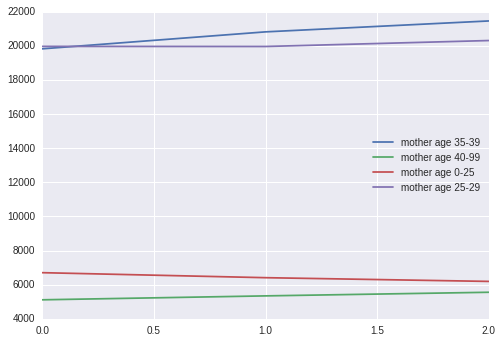

In [27]:
for col in data2013.columns[3:]:
    if col != 'total births':
        plt.plot([data2013[col].sum(), data2014[col].sum(), data2015[col].sum()], label=col)
plt.legend(loc='best' )

In [16]:
data2013.to_csv("../cleaned_data/2013/births2013.csv", index=False)

In [17]:
data2014.to_csv("../cleaned_data/2014/births2014.csv", index=False)

In [18]:
data2015.to_csv("../cleaned_data/2015/births2015.csv", index=False)

In [19]:
data2013[data2013['total births'] == data2013['total births'].max()]

,commune_name,id,mother age 30-34,mother age 35-39,mother age 40-99,total births,mother age 0-25,mother age 25-29
2323,Zürich,261,1789,1636,418,4870,265,762


In [20]:
len(data2013[data2013['total births'] == data2013['total births'].min()])

75

In [21]:
len(data2014[data2014['total births'] == data2014['total births'].min()])

79

In [22]:
len(data2015[data2015['total births'] == data2015['total births'].min()])

95

In [23]:
data2013.shape

(2324, 8)

In [24]:
data2014.shape

(2324, 8)

In [25]:
data2015.shape

(2324, 8)